In [19]:
%pip install librosa
%pip install matplotlib
%pip install pandas
%pip install sklearn
%pip install crepe
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached resampy-0.2.2.tar.gz (323 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/124.2 kB ? eta -:--:--
   ---------------------------------------- 124.2/124.2 kB 3.6 MB/s eta 0:00:00
  Created wheel for crepe: filename=crepe-0.0.15-py3-none-any.whl size=134848735 sha256=5e456ef8bb25b17939e3e723271f7626690452c7b8c47a6d7da952706f631f6a
  Stored in directory: c:\users\junio\appdata\local\pip\cache\wheels\87\af\8c\e103982d046153179f63d708c96647faf548df0e7606b94dd9
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320716 sha256=b720f643357fe1eb43bd28ae670bf518e08b6824a4735af7f56aaf09fd4bdd1e
  Stored in directory: c:\users\junio\appdata\local\pip\cache\wheels\6f\d1\5d\f13da53b1dcbc2624ff548456c9ffb526c914f53c12c318bb4
Successfully built crepe resampy
  A

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
compiam 0.3.0 requires hmmlearn~=0.2.7, but you have hmmlearn 0.3.2 which is incompatible.


In [20]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import IPython.display as ipd
import sklearn
import crepe

In [21]:
# Load the WAV file
#audio_file = "./101_mono.wav"

#y, sr = librosa.load(audio_file, sr=None)  # sr=None to preserve the original sampling rate

#Display audio
#ipd.Audio(audio_file)

In [22]:
def generate_fake_audio(duration, sample_rate):
    """
    Generate fake audio data.

    Args:
    - duration (float): Duration of the audio signal in seconds.
    - sample_rate (int): Sampling rate of the audio signal.

    Returns:
    - numpy.ndarray: Fake audio data.
    """
    # Calculate the number of samples
    num_samples = int(duration * sample_rate)

    # Generate a random audio signal (e.g., white noise)
    audio_data = np.random.normal(0, 1, num_samples)

    return audio_data

# Example usage:
duration = 5  # 5 seconds
sample_rate = 44100  # 44.1 kHz
y = generate_fake_audio(duration, sample_rate)

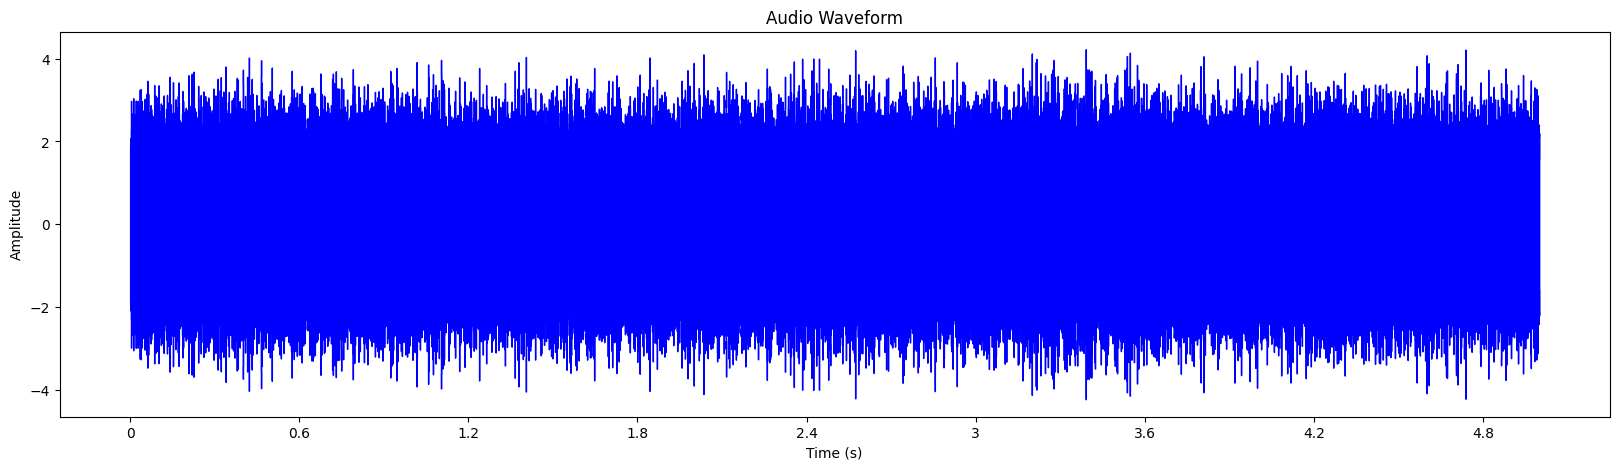

In [23]:
#Show audio waveform
plt.figure(figsize=(20, 5))
librosa.display.waveshow(y, sr=sample_rate, color="blue")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Audio Waveform')
plt.show()

In [24]:
# Size of the Fast Fourier Transform (FFT), which will also be used as the window length
n_fft=1024

# Step or stride between windows. If the step is smaller than the window length, the windows will overlap
hop_length=320

# Specify the window type for FFT/STFT
window_type ='hann'

# Calculate the spectrogram as the square of the complex magnitude of the STFT
spectrogram_librosa = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length, win_length=n_fft, window=window_type)) ** 2

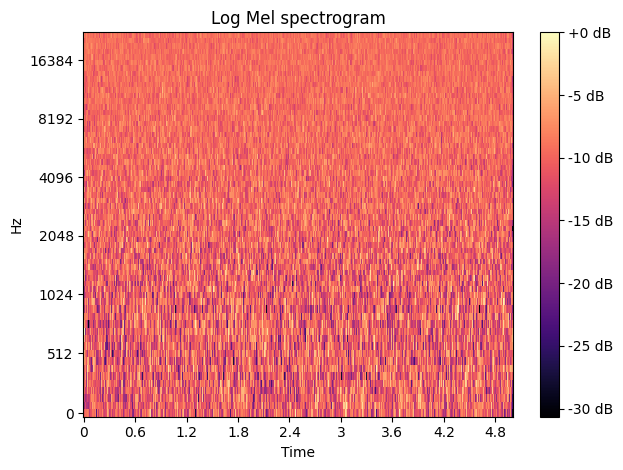

In [25]:
#Log Mel Spectrogram
mel_bins = 64 # Number of Mel bands
fmin = 0
fmax = None
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, win_length=n_fft, window=window_type, n_mels = mel_bins, power=2.0)


mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
librosa.display.specshow(mel_spectrogram_db, sr=sample_rate, x_axis='time', y_axis='mel',hop_length=hop_length)
plt.colorbar(format='%+2.0f dB')
plt.title('Log Mel spectrogram')
plt.tight_layout()
plt.show()

In [26]:
# Extract MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sample_rate, n_mfcc=13)  # You can adjust the number of MFCC coefficients (n_mfcc)

# Save MFCCs as a CSV file
mfccs_df = pd.DataFrame(mfccs)
mfccs_df.to_csv("mfccs.csv", index=False)

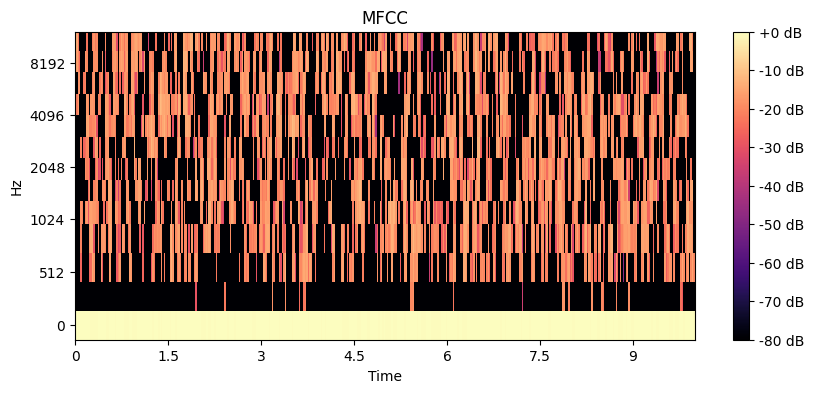

In [27]:
# Visualize the MFCCs
plt.figure(figsize=(10, 4))

librosa.display.specshow(librosa.power_to_db(mfccs, ref=np.max), y_axis='mel', x_axis='time')

plt.colorbar(format='%+2.0f dB')

plt.title('MFCC')

plt.show()

In [13]:
#Computing ZERO-CROSSING RATE
# Zooming in (won't be necessary when segmentation is done)
n0 = 9000
n1 = 9100
zero_crossings = librosa.zero_crossings(y[n0:n1], pad=False)
print(sum(zero_crossings))

45


In [29]:
#Pitch extraction
# Extract pitch with Crepe
time, frequency, confidence, activation = crepe.predict(y, sample_rate, viterbi=True)

# Print the estimated pitch (in Hz) at each time step
for t, f in zip(time, frequency):
    print(f"At time {t:.2f} seconds, estimated pitch is {f:.2f} Hz")


plt.figure(figsize=(10, 4))
plt.plot(time, frequency, label='Estimated pitch (Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Pitch Contour')
plt.grid(True)
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'tensorflow'

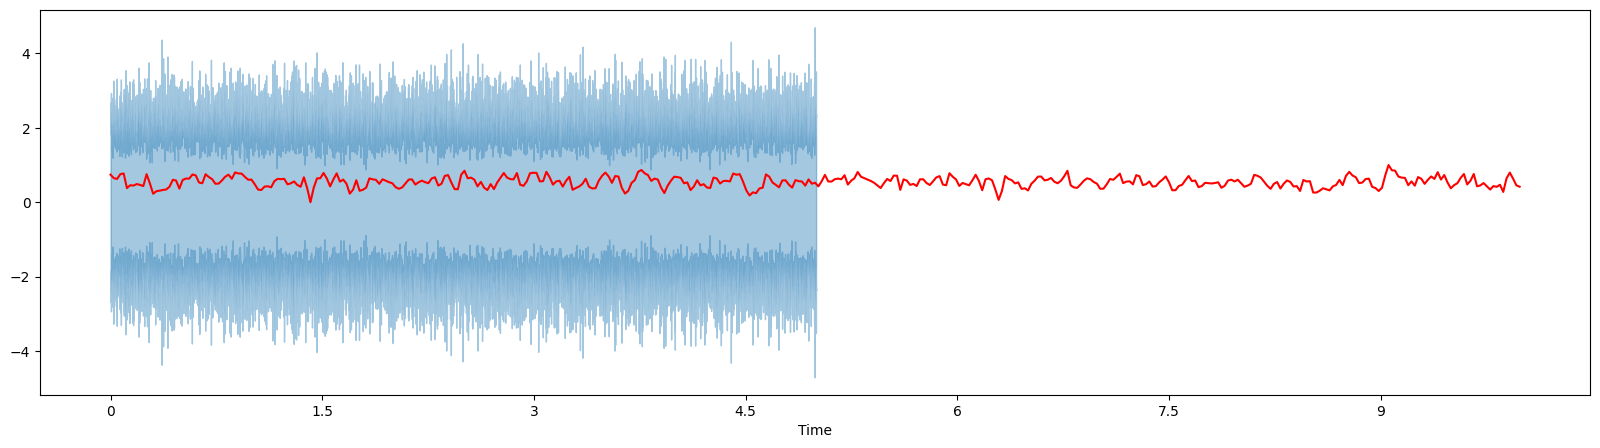

In [31]:
#Spectral centroid
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sample_rate)[0]
#spectral_centroids.shape

# Computing the time variable for visualization
plt.figure(figsize=(20,5))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(y, sr=sample_rate, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')